In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#%cd drive/MyDrive/zop
#!ls

[Errno 2] No such file or directory: 'drive/MyDrive/zop'
/content/drive/MyDrive/zop
dask-worker-space  diabetes.csv  projekt.ipynb	uzop_grupni_projekt.ipynb


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('diabetes.csv')

# Removing outliers

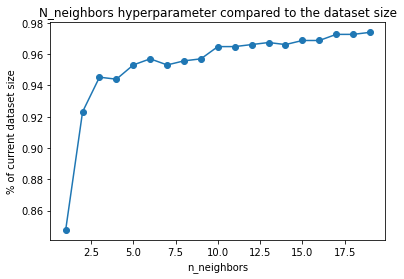

In [3]:
from sklearn.neighbors import LocalOutlierFactor

y = df['Outcome']
X = df.drop(columns=['Outcome'])

d = {}
for i in range(1, 20):
    lof = LocalOutlierFactor(n_neighbors=i)
    X_out = lof.fit_predict(X)
    d[i] = np.sum(X_out == 1)/len(X_out)

plt.plot(list(d.keys()), list(d.values()), '-o')
plt.xlabel('n_neighbors')
plt.ylabel('% of current dataset size')
plt.title('N_neighbors hyperparameter compared to the dataset size')
plt.show()

In [4]:
lof = LocalOutlierFactor(n_neighbors=4)
X_out = lof.fit_predict(X)

mask = X_out != -1

X = X.loc[mask, :]
y = y.loc[mask]

df = X[:]
df['Outcome'] = y[:]

print(len(X))
print(len(y))
print(len(df))

725
725
725


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [7]:
display(df[df['Pregnancies'] > 13])
df = df[df['Pregnancies'] <= 13]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
298,14,100,78,25,184,36.6,0.412,46,1
455,14,175,62,30,0,33.6,0.212,38,1


In [8]:
display(df[df['Glucose'] > 200])
df = df[df['Glucose'] <= 200]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [9]:
display(df[df['BloodPressure'] > 115])
df = df[df['BloodPressure'] <= 115]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [10]:
display(df[(df['BloodPressure'] < 40) & (df['BloodPressure'] != 0)])
df = df[(df['BloodPressure'] >= 40) | (df['BloodPressure'] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
599,1,109,38,18,120,23.1,0.407,26,0


In [11]:
display(df[df['SkinThickness'] > 65])
df = df[df['SkinThickness'] <= 65]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [12]:
display(df[(df['Insulin'] > 500) & (df['Outcome'] == 0)])
df = df[(df['Insulin'] <= 500) | (df['Outcome'] == 1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
286,5,155,84,44,545,38.7,0.619,34,0


In [13]:
display(df[(df['BMI'] > 50) & (df['Outcome'] == 0)])
df = df[(df['BMI'] <= 50) | (df['Outcome'] == 1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
673,3,123,100,35,240,57.3,0.88,22,0


In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000
mean,3.811978,120.683844,69.470752,20.278552,78.803621,31.955571,0.464336,32.997214,0.346797
std,3.246201,31.410967,18.110419,15.613010,108.080458,7.202455,0.319024,11.409824,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.238250,24.000000,0.000000
50%,3.000000,116.500000,72.000000,23.000000,36.500000,32.000000,0.365000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,130.000000,36.375000,0.613750,40.000000,1.000000
max,13.000000,199.000000,110.000000,60.000000,600.000000,52.300000,2.288000,70.000000,1.000000


# Removing missing values

In [15]:
print('      Glucose missing values: ',len(df[df['Glucose'] == 0.0]))
print('BloodPressure missing values: ',len(df[df['BloodPressure'] == 0.0]))
print('SkinThickness missing values: ',len(df[df['SkinThickness'] == 0.0]))
print('          BMI missing values: ',len(df[df['BMI'] == 0.0]))

      Glucose missing values:  5
BloodPressure missing values:  29
SkinThickness missing values:  214
          BMI missing values:  7


In [16]:
df.loc[df['Glucose'] == 0.0, 'Glucose'] = np.nan
df.loc[df['BMI'] == 0.0, 'BMI'] = np.nan
df.loc[df['SkinThickness'] == 0.0, 'SkinThickness'] = np.nan
df.loc[df['BloodPressure'] == 0.0, 'BloodPressure'] = np.nan
df = df.interpolate()

# Feature engineering

In [17]:
X = df.drop(columns=['Outcome'])
y = df[['Outcome']]

print(X.head())
print(y.head())

   Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0            6    148.0           72.0  ...  33.6                     0.627   50
1            1     85.0           66.0  ...  26.6                     0.351   31
2            8    183.0           64.0  ...  23.3                     0.672   32
3            1     89.0           66.0  ...  28.1                     0.167   21
4            0    137.0           40.0  ...  43.1                     2.288   33

[5 rows x 8 columns]
   Outcome
0        1
1        0
2        1
3        0
4        1


In [16]:
# plt.figure(figsize=(15, 15))
# sb.pairplot(df, hue='Outcome')

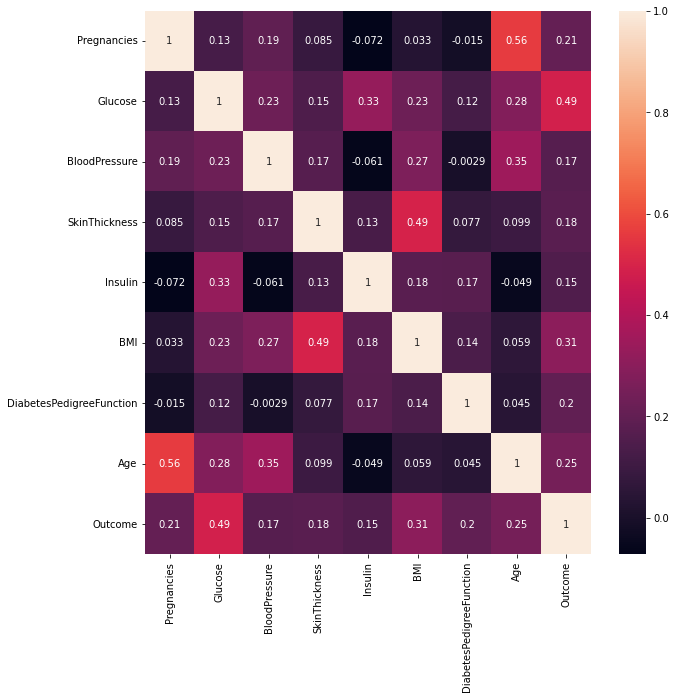

In [ ]:
# plt.figure(figsize=(10, 10))
# sb.heatmap(df.corr(),  annot=True)

In [18]:
!pip install autofeat

In [19]:
from autofeat import AutoFeatRegressor, AutoFeatClassifier
model = AutoFeatRegressor(verbose=1, feateng_steps=3)
X = model.fit_transform(X, y.values.reshape(-1))

[AutoFeat] The 3 step feature engineering process could generate up to 38556 features.
[AutoFeat] With 718 data points this new feature matrix would use about 0.11 gb of space.
[feateng] Step 1: transformation of original features
[feateng] Generated 37 transformed features from 8 original features - done.
[feateng] Step 2: first combination of features
[feateng] Generated 3875 feature combinations from 990 original feature tuples - done.
[feateng] Step 3: transformation of new features
[feateng] Generated 14500 transformed features from 3875 original features - done.
[feateng] Generated altogether 20138 new features in 3 steps
[feateng] Removing correlated features, as well as additions at the highest level
[feateng] Generated a total of 8148 additional features
[featsel] Scaling data...done.
[featsel] Feature selection run 1/5
[featsel] Feature selection run 2/5
[featsel] Feature selection run 3/5
[featsel] Feature selection run 4/5
[featsel] Feature selection run 5/5
[featsel] 26 fe

In [20]:
print(np.array(X.columns.tolist()))

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'BMI*Glucose'
 'log(sqrt(DiabetesPedigreeFunction)*Glucose**2)'
 '1/(Age**2 + Pregnancies**3)'
 '1/(-sqrt(Pregnancies) + log(SkinThickness))'
 '(-BloodPressure + Glucose)**2'
 '(sqrt(Pregnancies) + log(DiabetesPedigreeFunction))**3']


In [21]:
!pip install featurewiz

In [6]:
import pandas as pd
from featurewiz import featurewiz

tmp = pd.concat([X.reset_index(), y.reset_index()], axis=1)
df_train = tmp.sample(frac=0.8)
features1 = featurewiz(
    df_train,
    target='Outcome', 
    corr_limit=0.70, 
    verbose=2, 
    nrows=None, 
    dask_xgboost_flag=False
)

df_train = df_train[features1[1].columns.tolist()]
df_test = tmp[df_train.columns.tolist()].drop(df_train.index)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Imported DASK version = 0.0.73. nrows=None uses all rows. Set nrows=1000 to randomly sample fewer rows.
output = featurewiz(dataname, target, corr_limit=0.70, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=True, nrows=None)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']
                                
############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
Loading train data...
    Shape of your Data Set loaded: (580, 11)
You have duplicate column na

AttributeError: ignored

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()), 
    ('knn', KNeighborsClassifier())
])

params = {
    'knn__n_neighbors': list(range(2, 51)),
}

search = GridSearchCV(pipeline, params)
search.fit(df_train.drop(columns=['Outcome']), df_train['Outcome'])
print(search.best_score_)
print(search.best_params_)
print(search.cv_results_['mean_test_score'],'\n')

pipeline = Pipeline(steps=[
    ('scaler', MinMaxScaler()), 
    ('knn', KNeighborsClassifier())
])
params = {
    'knn__n_neighbors': list(range(2, 51)),
}

search = GridSearchCV(pipeline, params)
search.fit(df_train.drop(columns=['Outcome']), df_train['Outcome'])
print(search.best_score_)
print(search.best_params_)
print(search.cv_results_['mean_test_score'], '\n')

0.7683142639206713
{'knn__n_neighbors': 27}
[0.70035088 0.71768116 0.70381388 0.71946606 0.74910755 0.73690313
 0.74567506 0.74741419 0.73694889 0.72652937 0.73520976 0.75087719
 0.74567506 0.7561251  0.74913806 0.74739893 0.74913806 0.74913806
 0.75263158 0.75781846 0.76132723 0.76134249 0.74738368 0.76134249
 0.75263158 0.76831426 0.76655988 0.76829901 0.76308162 0.76135774
 0.75610984 0.7456598  0.76132723 0.75438596 0.75089245 0.7421968
 0.74045767 0.74569031 0.74567506 0.74393593 0.74045767 0.74739893
 0.73697941 0.7421968  0.74393593 0.74567506 0.73522502 0.74392067
 0.74044241] 

0.7578489702517163
{'knn__n_neighbors': 19}
[0.71426392 0.71078566 0.72646834 0.74913806 0.73345538 0.72651411
 0.72300534 0.72823799 0.73519451 0.7404119  0.73513349 0.74735317
 0.75778795 0.74038139 0.75778795 0.74910755 0.75435545 0.75784897
 0.75783371 0.75783371 0.75435545 0.75260107 0.75086194 0.75781846
 0.74213577 0.75089245 0.75087719 0.75609458 0.74564455 0.74392067
 0.73696415 0.74913806 0.74

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

pipeline1 = Pipeline(steps=[
    ('scaler', StandardScaler()), 
    ('knn', KNeighborsClassifier(27))
])
pipeline2 = Pipeline(steps=[
    ('scaler', MinMaxScaler()), 
    ('knn', KNeighborsClassifier(19))
])

X_train, y_train = df_train.drop(columns=['Outcome']), df_train['Outcome']
X_test, y_test = df_test.drop(columns=['Outcome']), df_test['Outcome']

pipeline1.fit(X_train, y_train)
pipeline2.fit(X_train, y_train)

print(f'1st model acc: {accuracy_score(pipeline1.predict(X_test), y_test)}')
print(f'2nd model acc: {accuracy_score(pipeline2.predict(X_test), y_test)}')

1st model acc: 0.6944444444444444
2nd model acc: 0.6805555555555556


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, SequentialFeatureSelector, f_classif
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline(steps=[('f_sel', SelectKBest()), ('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
params = {
    'f_sel__score_func': [f_classif],
    'f_sel__k': list(range(1, len(X.columns.tolist())+1)),
    'knn__n_neighbors': list(range(2, 51)),
}

search = GridSearchCV(pipeline, params)
search.fit(X, y['Outcome'].values.reshape(-1))
print(search.best_score_)
print(search.best_params_)

pipeline = Pipeline(steps=[('f_sel', SelectKBest()), ('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())])
params = {
    'f_sel__score_func': [f_classif],
    'f_sel__k': list(range(1, len(X.columns.tolist())+1)),
    'knn__n_neighbors': list(range(2, 51)),
}

search = GridSearchCV(pipeline, params)
search.fit(X, y)
print(search.best_score_)
print(search.best_params_)

0.7911519036519036
{'f_sel__k': 12, 'f_sel__score_func': <function f_classif at 0x7f5da886d5f0>, 'knn__n_neighbors': 22}
0.781419968919969
{'f_sel__k': 12, 'f_sel__score_func': <function f_classif at 0x7f5da886d5f0>, 'knn__n_neighbors': 24}


In [ ]:
acc1, acc2 = [], []
for i in range(100):
    pipeline1 = Pipeline(steps=[('f_sel', SelectKBest(k=12, score_func=f_classif)), ('scaler', StandardScaler()), ('knn', KNeighborsClassifier(22))])
    pipeline2 = Pipeline(steps=[('f_sel', SelectKBest(k=12, score_func=f_classif)), ('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier(24))])

    X_train, X_test, y_train, y_test = train_test_split(X, y['Outcome'], test_size=0.2)

    pipeline1.fit(X_train, y_train)
    pipeline2.fit(X_train, y_train)

    acc1.append(accuracy_score(pipeline1.predict(X_test), y_test))
    acc2.append(accuracy_score(pipeline2.predict(X_test), y_test))

print(f'1st model acc: {np.mean(acc1)}')
print(f'2nd model acc: {np.mean(acc2)}')

1st model acc: 0.766111111111111
2nd model acc: 0.7602777777777777


# Deep learning model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Dropout, Flatten
from keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Nadam, Adagrad, Adadelta, Adamax
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from keras.regularizers import l1, l2
from keras.initializers import HeNormal, HeUniform, GlorotUniform, GlorotNormal
from keras.callbacks import EarlyStopping, LearningRateScheduler

In [ ]:
y2 = df_train['Outcome'].values.reshape(-1)
X_train, X_val, y_train, y_val = train_test_split(df_train.drop(columns=['Outcome']).to_numpy(), y2, test_size=0.2, shuffle=True)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

model = Sequential()

model.add(Dense(
    1000,
    kernel_regularizer=l1(1e-3),
    kernel_initializer=HeNormal(),
    activation='relu',
    input_shape=(len(df_train.columns.tolist())-1,))
)

model.add(Dense(
    1000,
    kernel_regularizer=l1(1e-3),
    kernel_initializer=HeUniform(),
    activation='relu')
)

# model.add(Dropout(0.25))
# model.add(Flatten())

model.add(Dense(
    units=1,
    kernel_regularizer=l1(1e-3),
    activation='sigmoid')
)

model.compile(
    optimizer=Adam(learning_rate=0.0009),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

class_weight = compute_class_weight(y=y2, classes=np.unique(y2), class_weight='balanced')

num_epochs = 1000
history = model.fit(
    X_train, y_train,
    batch_size=64,
    epochs=num_epochs,
    validation_data=(X_val, y_val),
    class_weight={0: class_weight[0], 1: class_weight[1]},
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=70, restore_best_weights=True)]
)

Epoch 1/1000
8/8 [==============================] - 4s 151ms/step - loss: 41.7884 - accuracy: 0.6776 - val_loss: 39.1716 - val_accuracy: 0.7478
Epoch 2/1000
8/8 [==============================] - 0s 47ms/step - loss: 37.6564 - accuracy: 0.7669 - val_loss: 35.4474 - val_accuracy: 0.7391
Epoch 3/1000
8/8 [==============================] - 0s 59ms/step - loss: 33.7938 - accuracy: 0.8083 - val_loss: 31.8563 - val_accuracy: 0.7391
Epoch 4/1000
8/8 [==============================] - 0s 44ms/step - loss: 30.1339 - accuracy: 0.8148 - val_loss: 28.4430 - val_accuracy: 0.7391
Epoch 5/1000
8/8 [==============================] - 0s 43ms/step - loss: 26.7198 - accuracy: 0.7996 - val_loss: 24.9550 - val_accuracy: 0.7652
Epoch 6/1000
8/8 [==============================] - 0s 52ms/step - loss: 23.5449 - accuracy: 0.8562 - val_loss: 22.0073 - val_accuracy: 0.7391
Epoch 7/1000
8/8 [==============================] - 0s 47ms/step - loss: 20.6317 - accuracy: 0.8431 - val_loss: 19.3775 - val_accuracy: 0.773

In [ ]:
print(accuracy_score(model.predict(df_test.drop(columns=['Outcome']).values), y_test))

0.6666666666666666


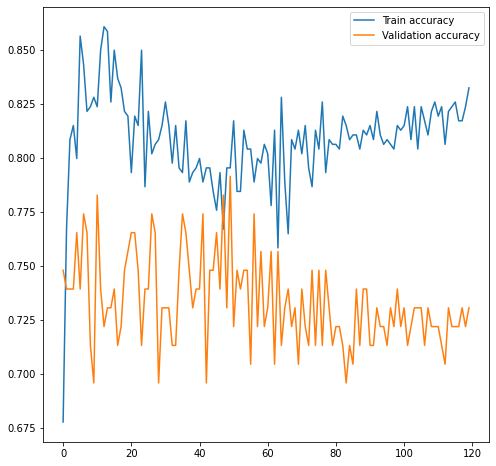

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(range(len(history.history['accuracy'])), history.history['accuracy'], label='Train accuracy')
plt.plot(range(len(history.history['val_accuracy'])), history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

# Logisticka regresija

In [198]:
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('diabetes.csv')
df_scaled = MinMaxScaler().fit_transform(df)
#print(df.head())
y = df_scaled[:, 8]
X = df_scaled[:, 0:8]

In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.25,
                                                   random_state=0,
                                                   stratify=y)



log_reg = LogisticRegression(solver='liblinear', max_iter=1000, 
                             tol=0.0001, 
                             )

log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [209]:
print("Train score:", log_reg.score(X_train, y_train))
print("Test score:", log_reg.score(X_test, y_test))

Train score: 0.7673611111111112
Test score: 0.7552083333333334


Randomized search

In [210]:
hyperparameters = dict(C=uniform(loc=0, scale=4), penalty=['l2'])

clf = RandomizedSearchCV(log_reg,
                        hyperparameters,
                        random_state=0,
                        n_iter=100,
                        cv=5,
                        verbose=0,
                        n_jobs=-1,
                        )

best_model = clf.fit(X_train, y_train)

In [ ]:
#print(best_model.cv_results_)

In [211]:
print(best_model.best_params_)
print(best_model.score(X_test, y_test))

{'C': 2.115579679011618, 'penalty': 'l2'}
0.7604166666666666


Grid Search

In [177]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1','l2']}
clf2 = GridSearchCV(log_reg, param_grid)
best_model_grid = clf2.fit(X_train, y_train)

In [ ]:
#print(best_model.cv_results_)

In [172]:
print(best_model_grid.best_params_)
print(best_model_grid.score(X_test, y_test))

{'C': 1, 'penalty': 'l1'}
0.78125


# Algoritam K najblizih susjeda

In [178]:
from sklearn.neighbors import KNeighborsClassifier

In [212]:
k_range = list(range(1,100))
weight_options = ["uniform", "distance"]

param_grid_knn = dict(n_neighbors = k_range, weights = weight_options)

knn = KNeighborsClassifier()
knn_model = GridSearchCV(knn, param_grid_knn, cv = 10, scoring = 'accuracy')
knn_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [213]:
print(knn_model.best_params_)
print(knn_model.score(X_test, y_test))

{'n_neighbors': 20, 'weights': 'uniform'}
0.734375


# Ansambli

In [224]:
from sklearn import svm, tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [215]:
model1 = log_reg = LogisticRegression(max_iter=1000, tol=0.0001)

model2 = KNeighborsClassifier(n_neighbors = 16, weights = 'uniform')

model3 = svm.SVC(C = 64, gamma = 0.03125, kernel = 'rbf')

model4 = tree.DecisionTreeClassifier()

model5 = GaussianNB()

model6 = RandomForestClassifier()

In [216]:
estimators = [('LR',model1), ('KNN',model2), ('SVC',model3),
              ('DT',model4), ('NB',model5), ('RF',model6)]

In [228]:
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X,y,
                                                   test_size=0.25,
                                                   random_state=0,
                                                   stratify=y)

In [229]:
kfold = StratifiedKFold(n_splits=10)
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X_train_sc, y_train_sc, cv=kfold)
print('Accuracy on train: ', results.mean())
ensemble_model = ensemble.fit(X_train_sc, y_train_sc)
pred = ensemble_model.predict(X_test_sc)
print('Accuracy on test:' , (y_test_sc == pred).mean())

Accuracy on train:  0.7621899576527525
Accuracy on test: 0.7760416666666666
